In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings 
warnings.filterwarnings('ignore')

In [2]:
train_file=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')

In [3]:
test_file=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')

In [4]:
train_file.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [5]:
test_file.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown


In [6]:
train_file.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [7]:
test_file.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success
13563,34839,29,admin.,married,secondary,no,2,yes,no,cellular,6,may,339,1,362,1,failure


In [8]:
train_file.shape

(31647, 18)

In [9]:
test_file.shape

(13564, 17)

In [10]:
train_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [11]:
test_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         13564 non-null  int64 
 1   age        13564 non-null  int64 
 2   job        13564 non-null  object
 3   marital    13564 non-null  object
 4   education  13564 non-null  object
 5   default    13564 non-null  object
 6   balance    13564 non-null  int64 
 7   housing    13564 non-null  object
 8   loan       13564 non-null  object
 9   contact    13564 non-null  object
 10  day        13564 non-null  int64 
 11  month      13564 non-null  object
 12  duration   13564 non-null  int64 
 13  campaign   13564 non-null  int64 
 14  pdays      13564 non-null  int64 
 15  previous   13564 non-null  int64 
 16  poutcome   13564 non-null  object
dtypes: int64(8), object(9)
memory usage: 1.8+ MB


- The columns ID, Age, Balance, Day, Duration, campaign, pdays and previour have an integer data type 
- The column Job, Marital, edducation, default, housing, loan, contact, month, poutcome and subscribed have an object data type

In [12]:
#showing Duplicated values sum
train_file.duplicated().sum()

0

In [13]:
#showing Duplicated values sum
test_file.duplicated().sum()

0

In [14]:
#showing null values 
train_file.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [15]:
#showing null values 
test_file.isnull().sum()

ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

In [16]:
for unique in train_file.columns:
    print(unique,'=>',train_file[unique].unique(),'\n')

ID => [26110 40576 15320 ... 19710 38556 14156] 

age => [56 31 27 57 33 50 45 35 36 44 39 43 41 53 64 48 60 29 30 42 46 32 63 47
 49 52 68 26 58 38 54 40 59 24 37 34 61 55 20 69 25 62 22 51 28 70 66 23
 87 71 74 81 73 76 72 84 19 79 75 21 83 80 67 18 77 65 82 86 78 88 92 95
 93 89 94 90] 

job => ['admin.' 'unknown' 'services' 'management' 'technician' 'retired'
 'blue-collar' 'housemaid' 'self-employed' 'student' 'entrepreneur'
 'unemployed'] 

marital => ['married' 'divorced' 'single'] 

education => ['unknown' 'secondary' 'tertiary' 'primary'] 

default => ['no' 'yes'] 

balance => [1933    3  891 ... 2787 8741 2968] 

housing => ['no' 'yes'] 

loan => ['no' 'yes'] 

contact => ['telephone' 'cellular' 'unknown'] 

day => [19 20 18 22  4  2  3  8 15  5 28  6 14  7 24 13  9 11 21 12 30 27 17 16
 25 10  1 29 26 31 23] 

month => ['nov' 'jul' 'jun' 'feb' 'sep' 'jan' 'may' 'aug' 'apr' 'oct' 'mar' 'dec'] 

duration => [  44   91  240 ...  939  839 1973] 

campaign => [ 2  1  3  4  7  5 3

In [17]:
for i in train_file.columns:
    counts = train_file[i].value_counts()
    print(f"Counts for column '{i}':\n{counts}\n")

Counts for column 'ID':
ID
26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: count, Length: 31647, dtype: int64

Counts for column 'age':
age
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: count, Length: 76, dtype: int64

Counts for column 'job':
job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64

Counts for column 'marital':
marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64

Counts for column 'education':
education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64

Counts for column 'default':
default
no

### Visualization

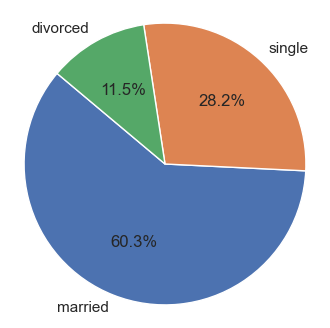

In [18]:
marital_counts = train_file['marital'].value_counts()
plt.figure(figsize=(4, 4))
sns.set(style="whitegrid")
sns.color_palette("pastel")
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

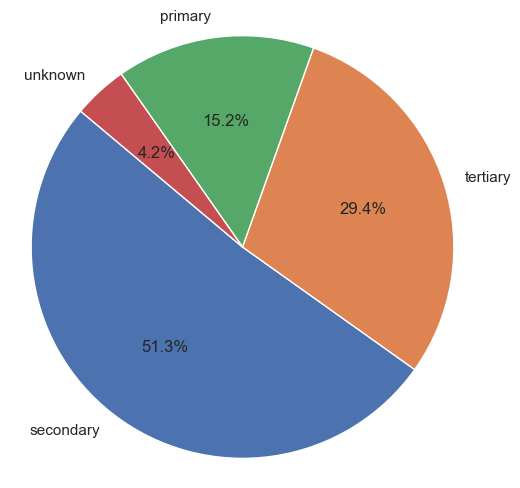

In [19]:
education_counts = train_file['education'].value_counts()
plt.figure(figsize=(6, 6))
sns.set(style="whitegrid")
sns.color_palette("pastel")
plt.pie(education_counts, labels=education_counts.index, autopct='%1.1f%%', startangle=140)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.show()

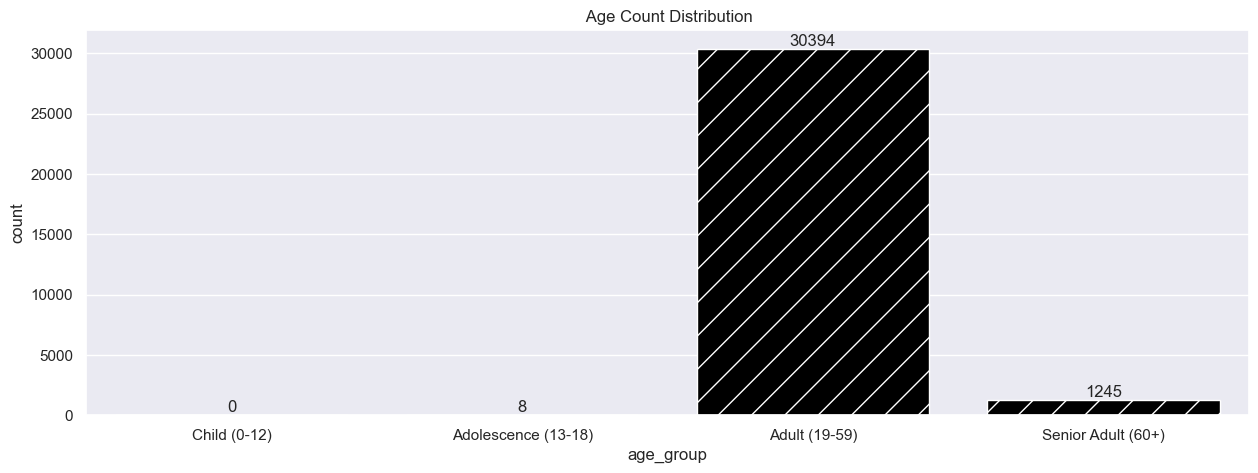

In [40]:
# Define new age groups
bins = [0, 13, 19, 60, 100]  # Adjust the upper limit of the last bin if necessary
labels = ['Child (0-12)', 'Adolescence (13-18)', 'Adult (19-59)', 'Senior Adult (60+)']
train_file['age_group'] = pd.cut(train_file['age'], bins=bins, labels=labels, right=False)

# Set custom color palette
custom_palette = ['black']
sns.set(rc={'figure.figsize': (15, 5)})

# Plot
ax = sns.countplot(x='age_group', data=train_file, palette=custom_palette)
for i in ax.containers:
    ax.bar_label(i)

# Customize bars
for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('white')  # New edge color

# Set title
ax.set_title(' Age Count Distribution')
plt.show()

Text(0.5, 1.0, 'Subscribed Analysis:Job Type')

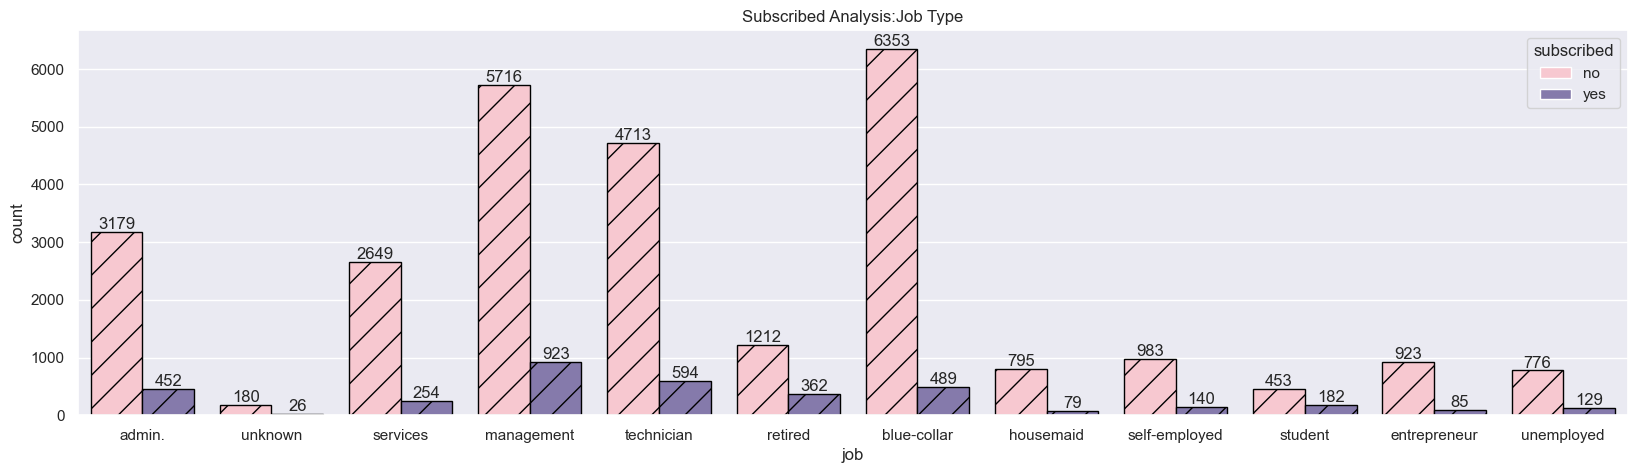

In [39]:
# Define custom color palette
custom_palette = ['pink','m']  
sns.set(rc={'figure.figsize':(20,5)})
ax=sns.countplot(x='job',data=train_file,hue='subscribed',palette=custom_palette)
for i in ax.containers:
    ax.bar_label(i)

for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('black')  # New edge color
ax.set_title('Subscribed Analysis:Job Type')

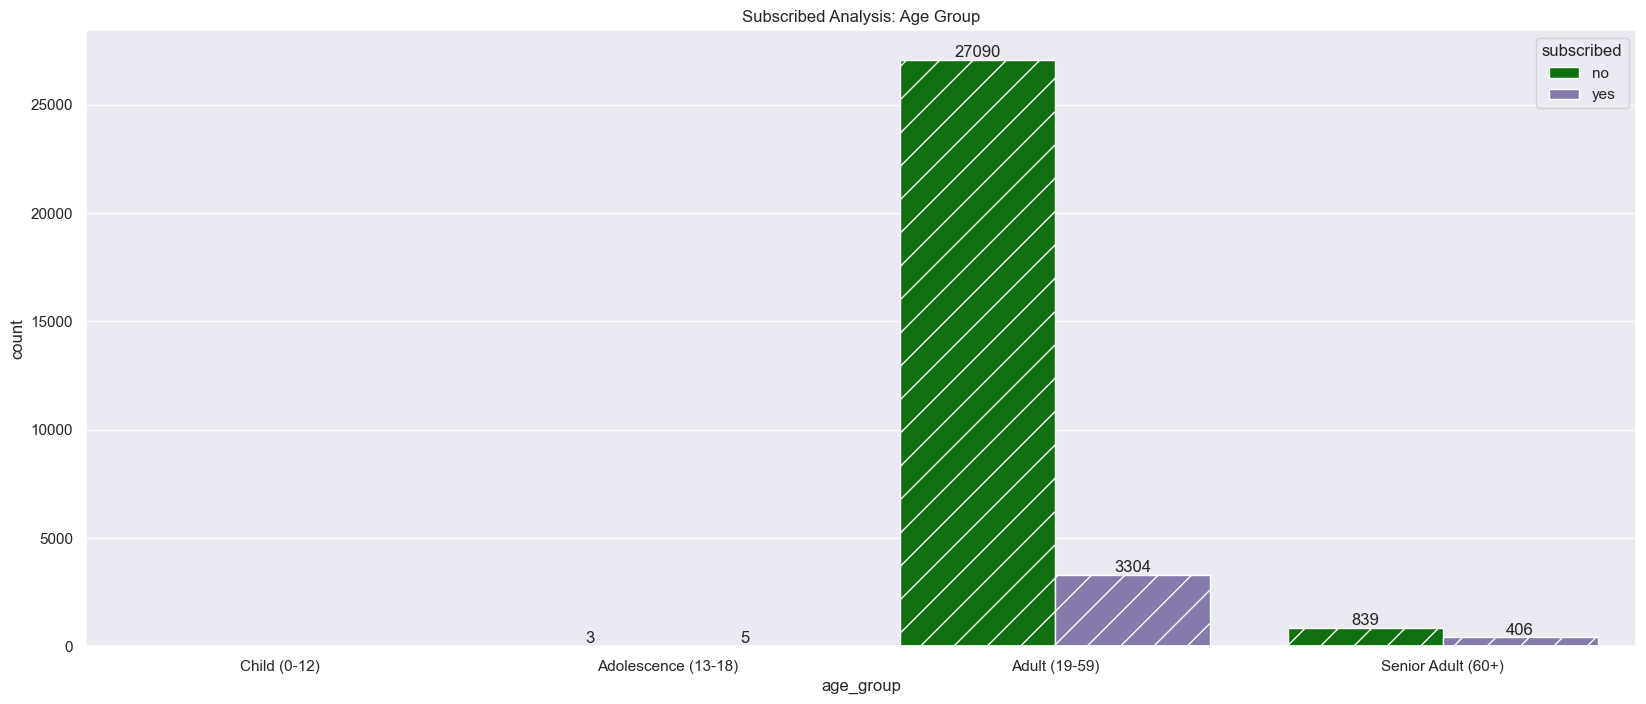

In [35]:
# Define new age groups
bins = [0, 13, 19, 60, 100]  # Adjust the upper limit of the last bin if necessary
labels = ['Child (0-12)', 'Adolescence (13-18)', 'Adult (19-59)', 'Senior Adult (60+)']
train_file['age_group'] = pd.cut(train_file['age'], bins=bins, labels=labels, right=False)

# Set custom color palette
custom_palette = ['green','m']
sns.set(rc={'figure.figsize': (20, 8)})

# Plot
ax = sns.countplot(x='age_group', hue='subscribed',data=train_file, palette=custom_palette)
for i in ax.containers:
    ax.bar_label(i)

# Customize bars
for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('white')  # New edge color

# Set title
ax.set_title('Subscribed Analysis: Age Group')
plt.show()

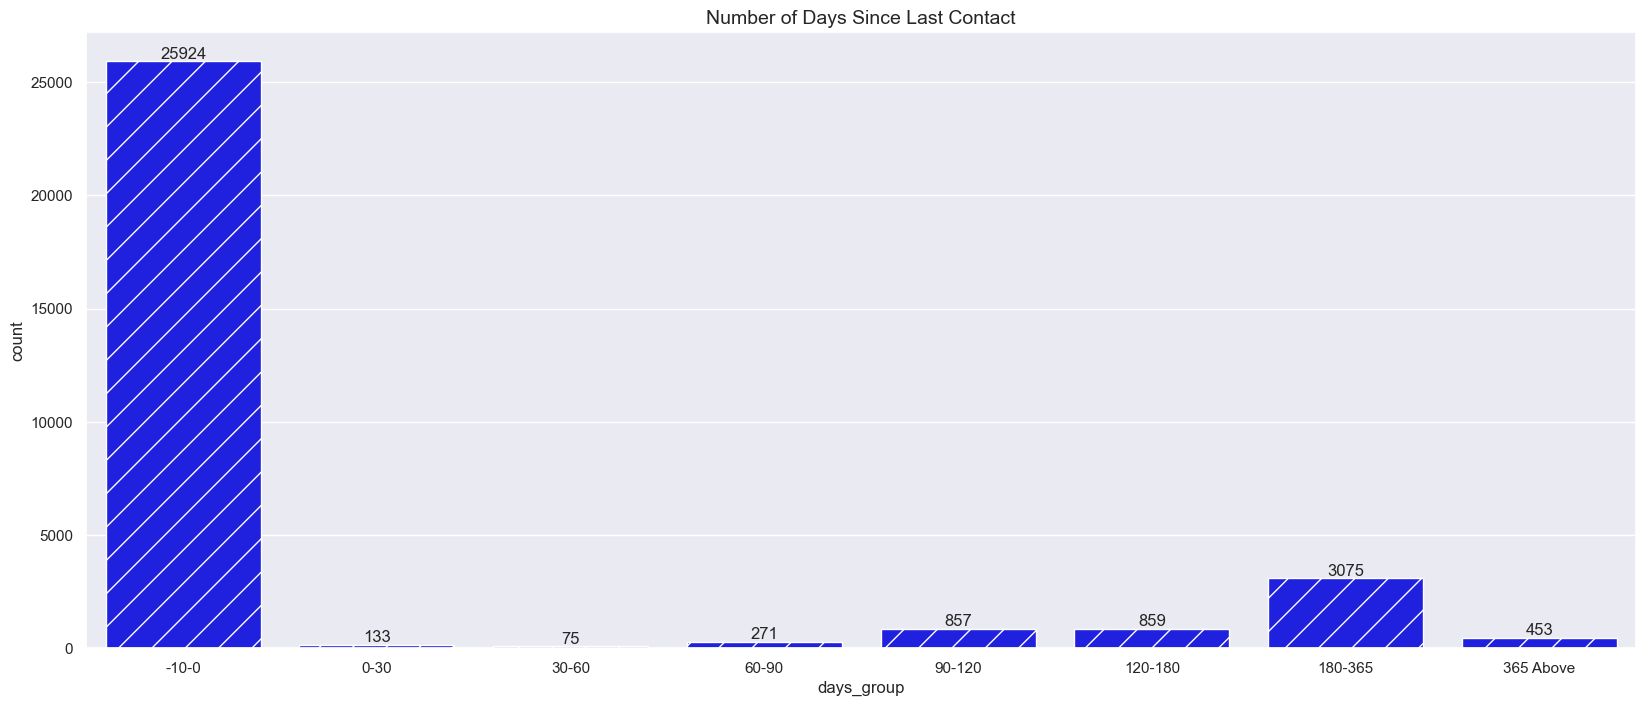

In [45]:
# Define new bins and labels for days since last contact
bins = [-10, 0, 30, 60, 90, 120, 180, 365, 1000]  # Adjust bins as per the data range
labels = ['-10-0', '0-30', '30-60', '60-90', '90-120', '120-180', '180-365', '365 Above']
train_file['days_group'] = pd.cut(train_file['pdays'], bins=bins, labels=labels, right=False)

# Set custom color palette
custom_palette = ['blue']
sns.set(rc={'figure.figsize': (20, 8)})

# Plot
ax = sns.countplot(x='days_group', data=train_file, palette=custom_palette)
for i in ax.containers:
    ax.bar_label(i)

# Customize bars
for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('white')  # New edge color

# Set title with smaller font size
ax.set_title('Number of Days Since Last Contact', fontsize=14)
plt.show()

Text(0.5, 1.0, 'Subscribed Analysis: Loan Status')

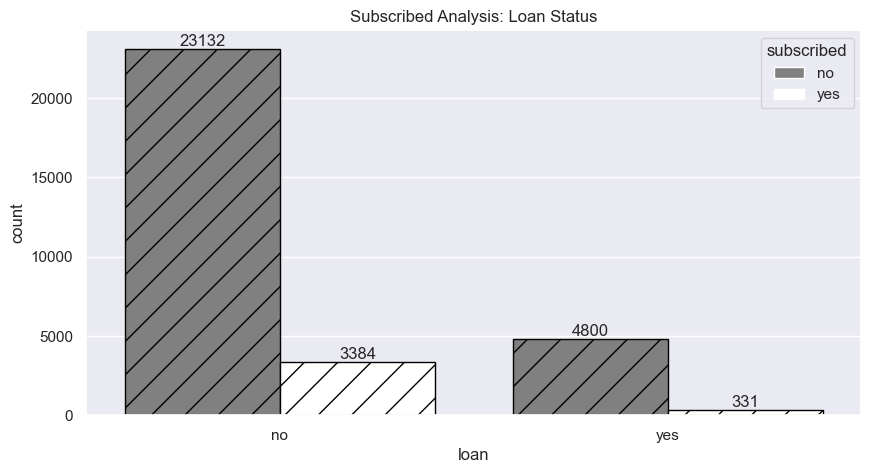

In [42]:
# Define custom color palette
custom_palette = ['grey','white']  
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.countplot(x='loan',data=train_file,hue='subscribed',palette=custom_palette)
for i in ax.containers:
    ax.bar_label(i)

for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('black')  # New edge color
ax.set_title('Subscribed Analysis: Loan Status')

Text(0.5, 1.0, 'Subscribed Analysis:Marital Status')

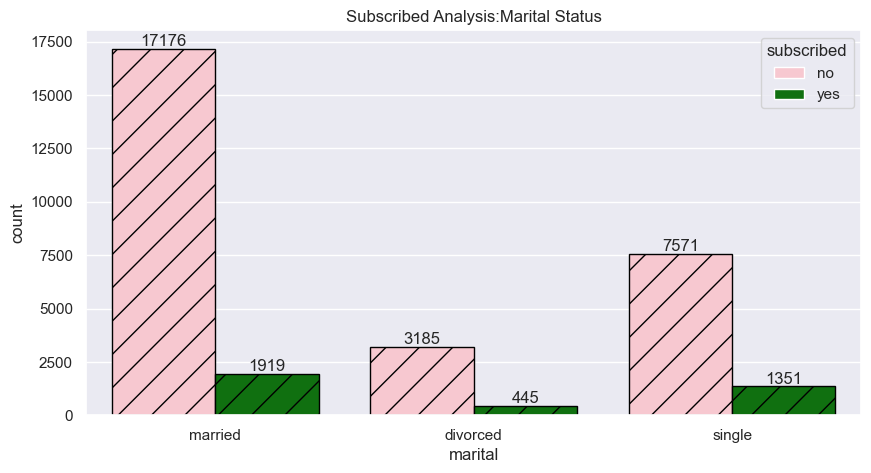

In [20]:
# Define custom color palette
custom_palette = ['pink','green','m']  
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.countplot(x='marital',data=train_file,hue='subscribed',palette=custom_palette)
for i in ax.containers:
    ax.bar_label(i)

for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('black')  # New edge color
ax.set_title('Subscribed Analysis:Marital Status')  

Text(0.5, 1.0, 'Subscribed Analysis:Education')

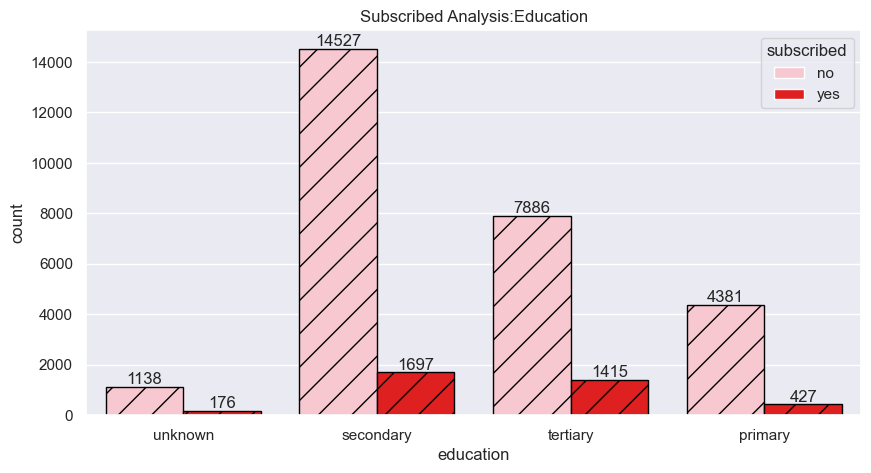

In [21]:
# Define custom color palette
custom_palette = ['pink','red']  
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.countplot(x='education',data=train_file,hue='subscribed',palette=custom_palette)
for i in ax.containers:
    ax.bar_label(i)

for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('black')  # New edge color
ax.set_title('Subscribed Analysis:Education')  

Text(0.5, 1.0, 'Subscribed Analysis:Housing')

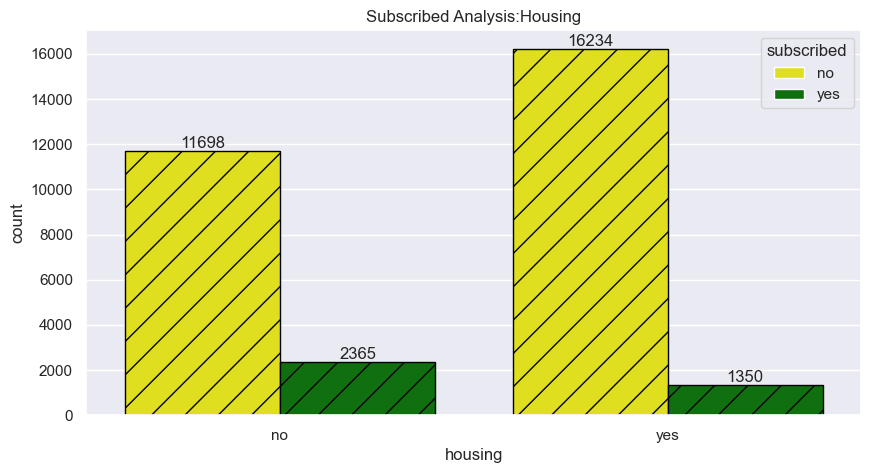

In [22]:
# Define custom color palette
custom_palette = ['yellow','green']  
sns.set(rc={'figure.figsize':(10,5)})
ax=sns.countplot(x='housing',data=train_file,hue='subscribed',palette=custom_palette)
for i in ax.containers:
    ax.bar_label(i)

for bar in ax.patches:
    bar.set_hatch('/')  # New hatch pattern
    bar.set_edgecolor('black')  # New edge color
ax.set_title('Subscribed Analysis:Housing')  

### Performing Encoding

In [20]:
#importing Encoder label incoder
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
list=['job','marital','education','default','housing','loan','contact','month','poutcome','subscribed']
for column in list:
    train_file[column]=labelencoder.fit_transform(train_file[column])

In [22]:
#importing Encoder label incoder
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
list=['job','marital','education','default','housing','loan','contact','month','poutcome']
for column in list:
    test_file[column]=labelencoder.fit_transform(test_file[column])

- We performing encoder for transforming string values into integer

#### Checking Correlation 

In [19]:
corr_matrix=train_file.corr()
corr_matrix

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,-0.038368,-0.003870,0.005733,-0.021947,0.005761,0.006466,0.024538
job,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,-0.089384,0.002694,0.001469,-0.022552,-0.003032,0.007101,0.038921
marital,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.003834,0.011544,-0.009394,0.019741,0.012717,-0.019770,0.046043
education,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,-0.055967,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
default,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.004694,-0.010849,0.018538,-0.029622,-0.015877,0.035067,-0.020168
balance,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.023056,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
housing,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,0.271442,0.003021,-0.021076,0.118790,0.034231,-0.092677,-0.141092
loan,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.024186,-0.012781,0.009340,-0.020078,-0.009258,0.010919,-0.072266
contact,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,0.362934,-0.016503,0.022666,-0.245076,-0.141098,0.272083,-0.150051
day,-0.011056,0.020951,-0.007686,0.017902,0.009996,0.003461,-0.025666,0.014769,-0.027046,1.000000,-0.000604,-0.032288,0.159168,-0.087626,-0.048752,0.077586,-0.029600


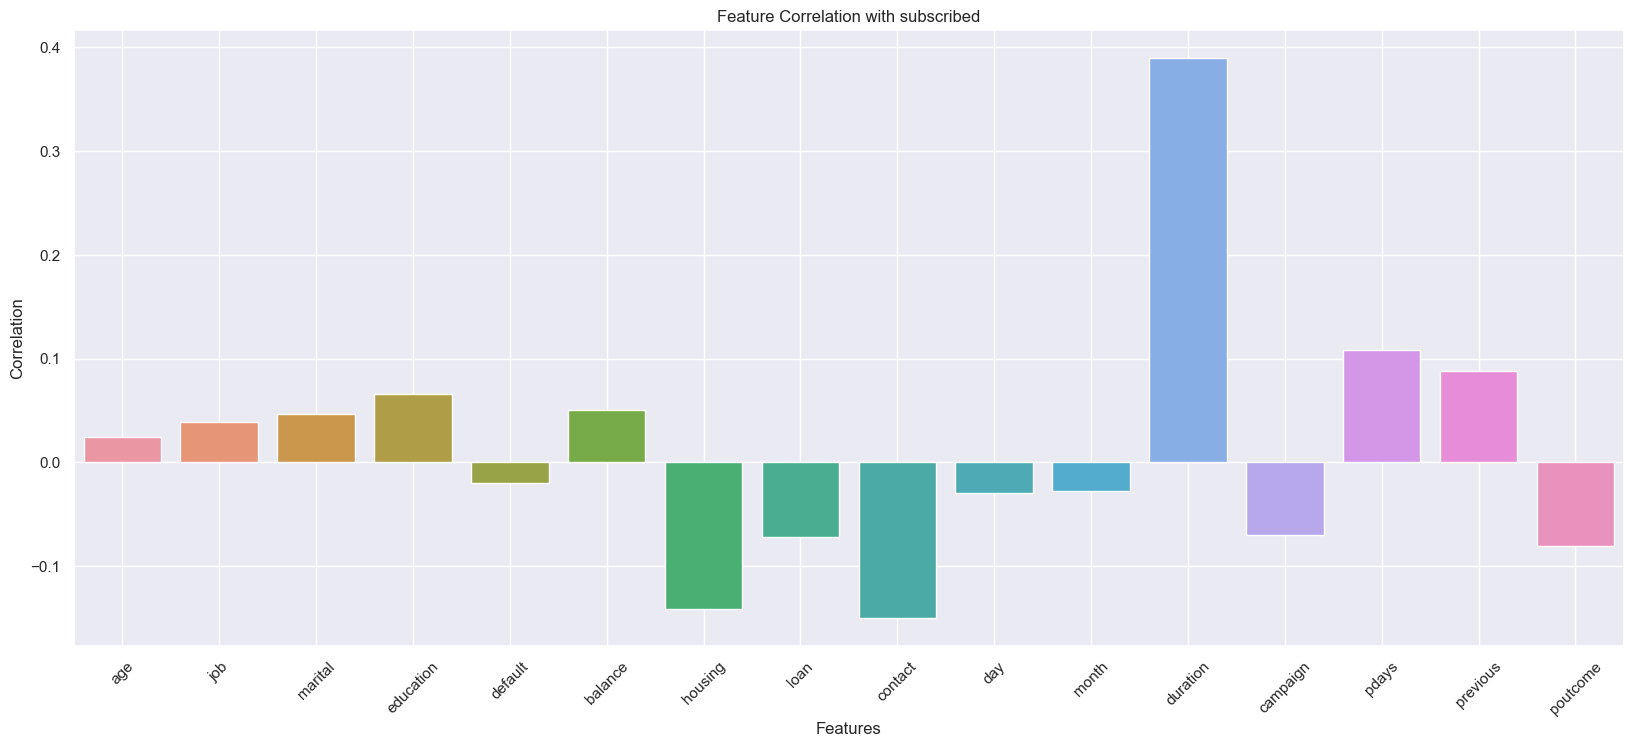

In [20]:
# Plot correlation with target variable
plt.figure(figsize=(20, 8))
sns.barplot(x=corr_matrix['subscribed'].drop('subscribed').index, y=corr_matrix['subscribed'].drop('subscribed').values)
plt.title("Feature Correlation with subscribed")
plt.xlabel("Features")
plt.ylabel("Correlation")
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

##### - Negative Correlation
The features default, housing, loan, contact, day, month, campaign, and poutcome have a negative correlation with the target variable, which is likely whether a client subscribes to a term deposit (y).

- Default: Clients with a history of defaulting on credit are less likely to subscribe to a term deposit.
- Housing: Clients with a housing loan are less likely to subscribe, possibly due to existing financial commitments.
- Loan: Similarly, clients with other personal loans are less likely to subscribe, indicating that those with more debt are less likely to commit to new savings products.
- Contact: The type of contact communication might negatively influence the subscription rate; for example, calls from certain channels might be less effective.
- Day: The day of the month when the client was last contacted might influence their likelihood to subscribe, with certain days possibly being less effective.
- Month: The month of contact might affect the outcome, with some months being less favorable for subscriptions.
- Campaign: The number of contacts performed during this campaign (and for this client) might have a saturation point, where too many contacts negatively affect the client's decision.
- Poutcome: The outcome of the previous marketing campaign; if previous campaigns were unsuccessful, the client might be less likely to subscribe again.

##### - Positive Correlation
The features age, job, marital, education, balance, duration, pdays, and previous have a positive correlation with the target variable.

- Age: Older clients might have more financial stability or interest in savings products, thus being more likely to subscribe.
- Job: Clients in certain professions might have a higher propensity to subscribe to term deposits, possibly due to higher income or financial awareness.
- Marital: Marital status might influence financial decisions, with married clients possibly being more likely to invest in term deposits.
- Education: Higher education levels might correlate with a better understanding of financial products and thus a higher likelihood of subscribing.
- Balance: Clients with higher balances are more likely to subscribe, as they have more available funds to invest.
- Duration: The duration of the last contact call in seconds; longer calls might indicate more interest or better communication, leading to higher subscription rates.
- Pdays: Number of days since the client was last contacted by a previous campaign; a shorter time might indicate ongoing interest.
- Previous: The number of contacts performed before this campaign; clients with more previous contacts might have built a relationship with the bank, increasing the likelihood of subscribing.

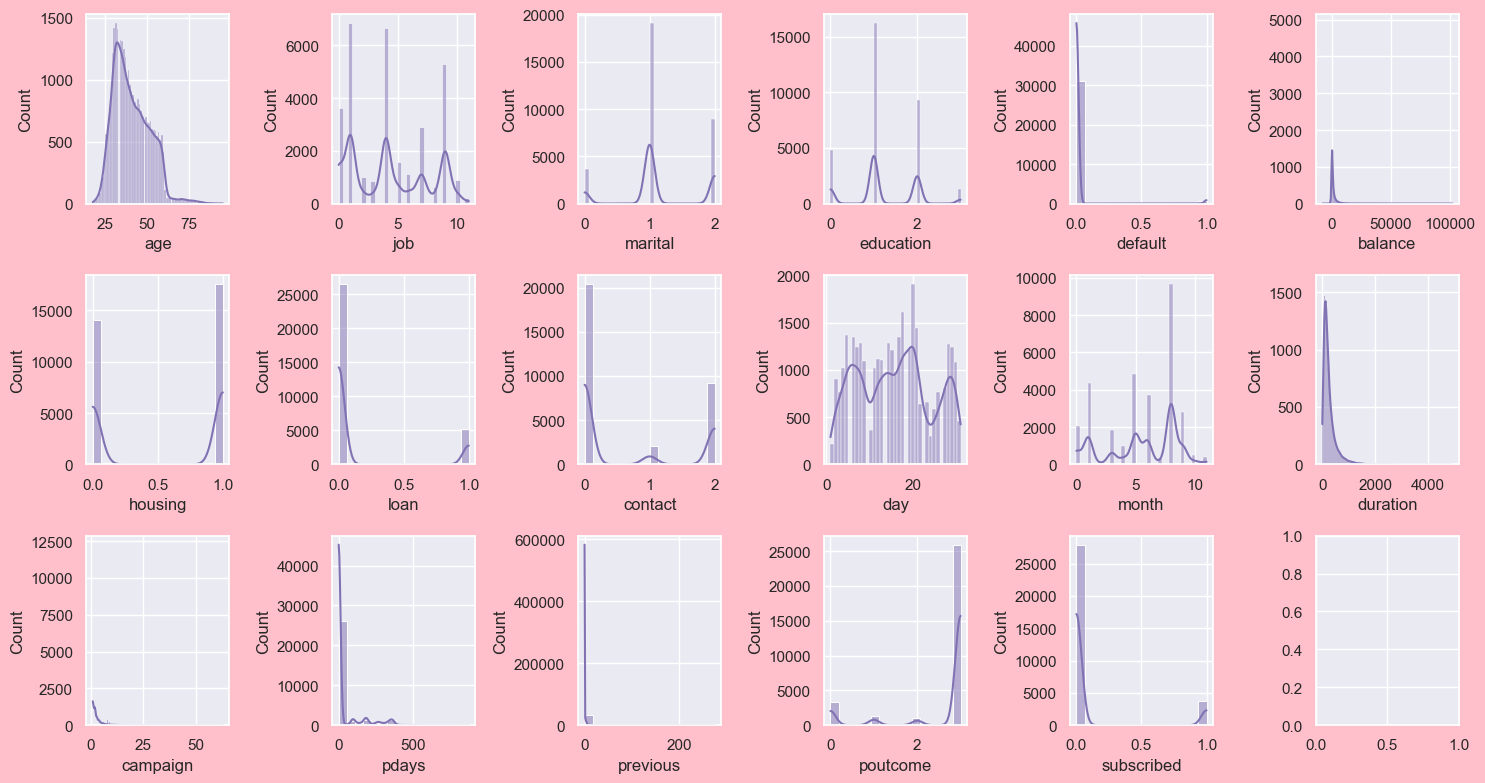

In [21]:
def plot_histograms(data):
    fig, axes = plt.subplots(3,6, figsize=(15, 8), facecolor='pink')
    axes = axes.flatten()
    
    for i, feature in enumerate(data.columns):
        ax = axes[i]
        sns.histplot(data[feature], color='m',kde=True,ax=ax)
        ax.set_label(feature)
    
    plt.tight_layout()
    plt.show()

# Call the function with the dataset
plot_histograms(train_file)

### Splitting the data into training and test

In [23]:
x=train_file.iloc[:,0:-1]
y=train_file.iloc[:,-1]
print('Feature Dimension',x.shape)
print('Label Dimension',y.shape)

Feature Dimension (31647, 16)
Label Dimension (31647,)


### Feature scaling using MinMaxScaler

In [24]:
from sklearn.preprocessing import MinMaxScaler

# Create a MinMaxScaler object
scale = MinMaxScaler()

# Fit the scaler to your data and transform it
x=pd.DataFrame(scale.fit_transform(x),columns=x.columns)

#### Model Selection

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
#Importing mode
from sklearn.linear_model import LogisticRegression #Logistic Regression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier #Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier #Random Forest Classifier and Extra Trees Classifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier #Gradient Boosting Classifier ,AdaBoost Classifier 
from sklearn.svm import SVC #Support Vector Classifier
from sklearn.neighbors import KNeighborsClassifier #K-Nearest Neighbors Classifier

In [27]:
#find the best random State
max_accuracy=0
best_state=0
random_state=range(1,200)
for state in random_state:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=state)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>max_accuracy:
        max_accuracy=acc
        best_state=state
print("Maximum accuracy_Score is=>",max_accuracy,"On Random State=>",best_state)

Maximum accuracy_Score is=> 0.896998420221169 On Random State=> 59


In [28]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=best_state)

#### LogisticRegression

In [29]:
LG=LogisticRegression()
LG.fit(x_train,y_train)
pred_lg=LG.predict(x_test)
print(LG)
print('Accuracy Score:-',accuracy_score(y_test,pred_lg))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_lg))
print('Classification Report:-',classification_report(y_test,pred_lg))
print('---'*20)

LogisticRegression()
Accuracy Score:- 0.896998420221169
Confusion Matrix:- [[8327  125]
 [ 853  190]]
Classification Report:-               precision    recall  f1-score   support

           0       0.91      0.99      0.94      8452
           1       0.60      0.18      0.28      1043

    accuracy                           0.90      9495
   macro avg       0.76      0.58      0.61      9495
weighted avg       0.87      0.90      0.87      9495

------------------------------------------------------------


#### ExtraTreesClassifier

In [30]:
etc=ExtraTreesClassifier()
etc.fit(x_train,y_train)
pred_etc=etc.predict(x_test)
print(etc)
print('Accuracy Score:-',accuracy_score(y_test,pred_etc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_etc))
print('Classification Report:-',classification_report(y_test,pred_etc))
print('---'*20)

ExtraTreesClassifier()
Accuracy Score:- 0.906477093206951
Confusion Matrix:- [[8259  193]
 [ 695  348]]
Classification Report:-               precision    recall  f1-score   support

           0       0.92      0.98      0.95      8452
           1       0.64      0.33      0.44      1043

    accuracy                           0.91      9495
   macro avg       0.78      0.66      0.69      9495
weighted avg       0.89      0.91      0.89      9495

------------------------------------------------------------


##### DecisionTreeClassifier

In [31]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
pred_dtc=dtc.predict(x_test)
print(dtc)
print('Accuracy Score:-',accuracy_score(y_test,pred_dtc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_dtc))
print('Classification Report:-',classification_report(y_test,pred_dtc))
print('---'*20)

DecisionTreeClassifier()
Accuracy Score:- 0.8737230121116377
Confusion Matrix:- [[7812  640]
 [ 559  484]]
Classification Report:-               precision    recall  f1-score   support

           0       0.93      0.92      0.93      8452
           1       0.43      0.46      0.45      1043

    accuracy                           0.87      9495
   macro avg       0.68      0.69      0.69      9495
weighted avg       0.88      0.87      0.88      9495

------------------------------------------------------------


#### GradientBoostingClassifier

In [32]:
gbc=GradientBoostingClassifier()
gbc.fit(x_train,y_train)
pred_gbc=gbc.predict(x_test)
print(gbc)
print('Accuracy Score:-',accuracy_score(y_test,pred_gbc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_gbc))
print('Classification Report:-',classification_report(y_test,pred_gbc))
print('---'*20)

GradientBoostingClassifier()
Accuracy Score:- 0.9079515534491838
Confusion Matrix:- [[8213  239]
 [ 635  408]]
Classification Report:-               precision    recall  f1-score   support

           0       0.93      0.97      0.95      8452
           1       0.63      0.39      0.48      1043

    accuracy                           0.91      9495
   macro avg       0.78      0.68      0.72      9495
weighted avg       0.90      0.91      0.90      9495

------------------------------------------------------------


#### AdaBoostClassifier

In [33]:
abc=AdaBoostClassifier()
abc.fit(x_train,y_train)
pred_abc=abc.predict(x_test)
print(abc)
print('Accuracy Score:-',accuracy_score(y_test,pred_abc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_abc))
print('Classification Report:-',classification_report(y_test,pred_abc))
print('---'*20)

AdaBoostClassifier()
Accuracy Score:- 0.9002632964718272
Confusion Matrix:- [[8196  256]
 [ 691  352]]
Classification Report:-               precision    recall  f1-score   support

           0       0.92      0.97      0.95      8452
           1       0.58      0.34      0.43      1043

    accuracy                           0.90      9495
   macro avg       0.75      0.65      0.69      9495
weighted avg       0.88      0.90      0.89      9495

------------------------------------------------------------


#### RandomForestClassifier

In [34]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
pred_rfc=rfc.predict(x_test)
print(rfc)
print('Accuracy Score:-',accuracy_score(y_test,pred_rfc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_rfc))
print('Classification Report:-',classification_report(y_test,pred_rfc))
print('---'*20)

RandomForestClassifier()
Accuracy Score:- 0.908899420747762
Confusion Matrix:- [[8214  238]
 [ 627  416]]
Classification Report:-               precision    recall  f1-score   support

           0       0.93      0.97      0.95      8452
           1       0.64      0.40      0.49      1043

    accuracy                           0.91      9495
   macro avg       0.78      0.69      0.72      9495
weighted avg       0.90      0.91      0.90      9495

------------------------------------------------------------


#### KNeighborsClassifier

In [35]:
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
pred_knn=knn.predict(x_test)
print(knn)
print('Accuracy Score:-',accuracy_score(y_test,pred_knn))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_knn))
print('Classification Report:-',classification_report(y_test,pred_knn))
print('---'*20)

KNeighborsClassifier()
Accuracy Score:- 0.8953133228014745
Confusion Matrix:- [[8273  179]
 [ 815  228]]
Classification Report:-               precision    recall  f1-score   support

           0       0.91      0.98      0.94      8452
           1       0.56      0.22      0.31      1043

    accuracy                           0.90      9495
   macro avg       0.74      0.60      0.63      9495
weighted avg       0.87      0.90      0.87      9495

------------------------------------------------------------


#### SVC

In [36]:
svc=SVC()
svc.fit(x_train,y_train)
pred_svc=svc.predict(x_test)
print(knn)
print('Accuracy Score:-',accuracy_score(y_test,pred_svc))
print('Confusion Matrix:-',confusion_matrix(y_test,pred_svc))
print('Classification Report:-',classification_report(y_test,pred_svc))
print('---'*20)

KNeighborsClassifier()
Accuracy Score:- 0.8974196945760927
Confusion Matrix:- [[8342  110]
 [ 864  179]]
Classification Report:-               precision    recall  f1-score   support

           0       0.91      0.99      0.94      8452
           1       0.62      0.17      0.27      1043

    accuracy                           0.90      9495
   macro avg       0.76      0.58      0.61      9495
weighted avg       0.87      0.90      0.87      9495

------------------------------------------------------------


### Cross Validation Score

In [37]:
from sklearn.model_selection import cross_val_score

#### LogisticRegression

In [38]:
score=cross_val_score(LG,x,y)
print(score)
print(score.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_lg)-score.mean())*100)

[0.89162717 0.89320695 0.88813399 0.88781798 0.888766  ]
0.8899104176292235
Difference between accuracy score and cross validation score is: 0.708800259194553


#### ExtraTreesClassifier

In [39]:
score1=cross_val_score(etc,x,y)
print(score1)
print(score1.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_etc)-score1.mean())*100)

[0.90537125 0.90442338 0.8999842  0.90109022 0.89824617]
0.9018230433045108
Difference between accuracy score and cross validation score is: 0.4654049902440227


##### DecisionTreeClassifier

In [40]:
score2=cross_val_score(dtc,x,y)
print(score2)
print(score2.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_dtc)-score2.mean())*100)

[0.87266983 0.87014218 0.87280771 0.87264971 0.87675778]
0.8730054412385426
Difference between accuracy score and cross validation score is: 0.07175708730950969


#### GradientBoostingClassifier

In [41]:
score3=cross_val_score(gbc,x,y)
print(score3)
print(score3.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_gbc)-score3.mean())*100)

[0.9056872  0.90410742 0.90172223 0.90282825 0.90203824]
0.9032766694697818
Difference between accuracy score and cross validation score is: 0.4674883979401967


#### AdaBoostClassifier

In [42]:
score4=cross_val_score(abc,x,y)
print(score4)
print(score4.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_abc)-score4.mean())*100)

[0.89383886 0.89826224 0.89208406 0.89729815 0.89619213]
0.8955350892366616
Difference between accuracy score and cross validation score is: 0.4728207235165649


#### RandomForestClassifier

In [43]:
score5=cross_val_score(rfc,x,y)
print(score5)
print(score5.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_rfc)-score5.mean())*100)

[0.90726698 0.90695103 0.90361827 0.90330226 0.90425028]
0.9050777621106185
Difference between accuracy score and cross validation score is: 0.38216586371434547


#### KNeighborsClassifier

In [44]:
score6=cross_val_score(knn,x,y)
print(score6)
print(score6.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_knn)-score6.mean())*100)

[0.89241706 0.8878357  0.88607995 0.88560594 0.88797598]
0.8879829277053369
Difference between accuracy score and cross validation score is: 0.7330395096137532


#### SVC

In [45]:
score7=cross_val_score(svc,x,y)
print(score7)
print(score7.mean())
print('Difference between accuracy score and cross validation score is:',(accuracy_score(y_test,pred_svc)-score7.mean())*100)

[0.89052133 0.89210111 0.88955601 0.89192605 0.89003002]
0.890826904015394
Difference between accuracy score and cross validation score is: 0.6592790560698725


##### Based on these observations
- The RandomForestClassifier seems to perform relatively well among the models tested, as it has a high mean cross-validation score and a small difference between accuracy score and cross-validation score
- RandomForestClassifier is our best  fitting and best performing model

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
param_grid={'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4]}

In [48]:
GCV=GridSearchCV(rfc,param_grid,cv=5)

In [49]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'n_estimators': [100, 200, 300]})

In [51]:
GCV.best_params_

{'max_depth': 20,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'n_estimators': 300}

In [55]:
best_model=RandomForestClassifier(n_estimators=300,max_depth=20,max_features='auto',min_samples_leaf=1)
best_model.fit(x_train,y_train)
pred_RFC=best_model.predict(x_test)
print('Accuracy Score:-',accuracy_score(y_test,pred_RFC)*100)
print('Confusion Matrix:-',confusion_matrix(y_test,pred_RFC))
print('Classification Report:-',classification_report(y_test,pred_RFC))

Accuracy Score:- 91.02685624012639
Confusion Matrix:- [[8221  231]
 [ 621  422]]
Classification Report:-               precision    recall  f1-score   support

           0       0.93      0.97      0.95      8452
           1       0.65      0.40      0.50      1043

    accuracy                           0.91      9495
   macro avg       0.79      0.69      0.72      9495
weighted avg       0.90      0.91      0.90      9495



##### By adding parameter my model give 91% accuracy

In [56]:
from sklearn.metrics import roc_curve,auc,roc_auc_score,precision_recall_curve
from sklearn import metrics

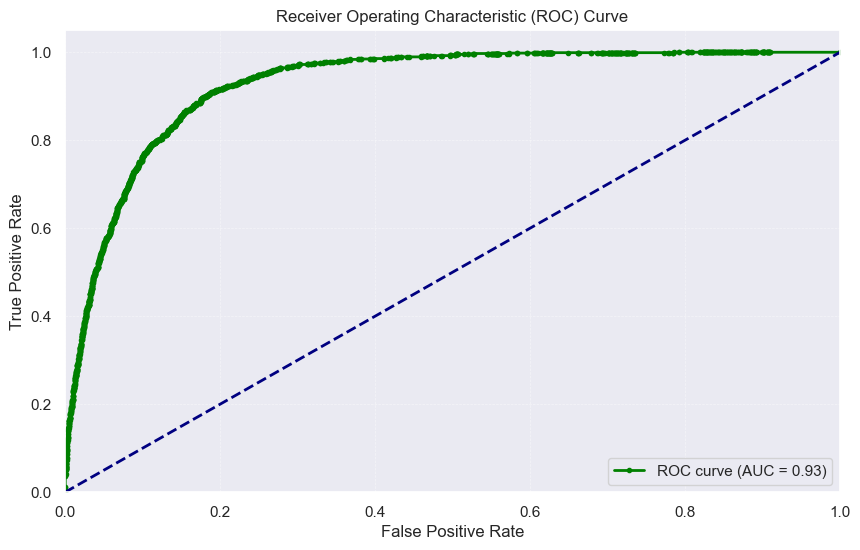

In [57]:
# Calculate probabilities for the positive class
y_prob = best_model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='green', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})', marker='o', markersize=3)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

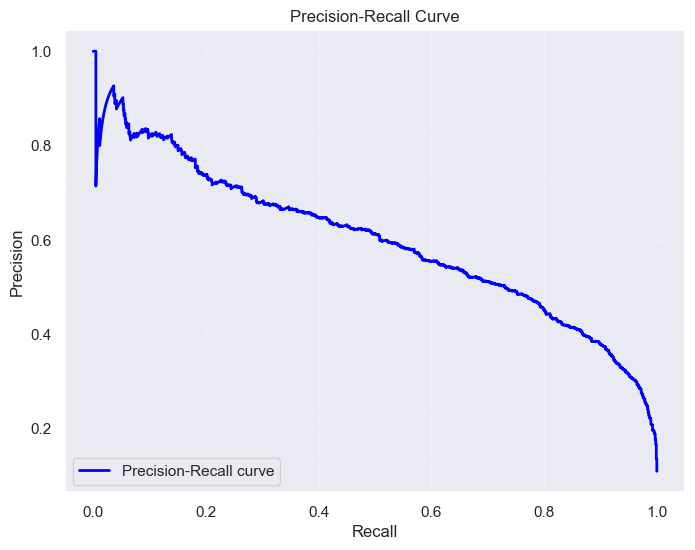

In [58]:
from sklearn.metrics import precision_recall_curve

# Calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_prob)

# Plot precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
plt.show()

### Saving the Model

In [59]:
#importing joblib and saving model
import joblib
joblib.dump(best_model,"Bank Marleting Project.pkl")

['Bank Marleting Project.pkl']

In [61]:
#Now loading file and checcking prediction 
model=joblib.load("Bank Marleting Project.pkl")

In [62]:
prediction=model.predict(x_test)
prediction

array([0, 1, 0, ..., 0, 0, 0])

In [63]:
Original=np.array(y_test)
df=pd.DataFrame()
df['Original']=Original
df['prediction']=prediction
df.head()

,Original,prediction
0,0,0
1,1,1
2,1,0
3,0,0
4,0,0


#### Now predicting test data set

In [64]:
test_file

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,8,20,6,-1,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,5,372,1,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,8,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,8,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,5,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0,45,0,0,0,28,1,148,4,-1,0,3
13560,11743,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,28292,35,5,1,0,0,285,1,0,0,29,4,136,1,-1,0,3
13562,45163,29,0,2,1,0,464,0,0,0,9,9,208,2,91,3,2


In [66]:
test_data=test_file.drop(columns='ID')

In [68]:
test_file['PREDICTION']=model.predict(test_data)

In [69]:
test_data_prediction=test_file[['ID','PREDICTION']]

In [72]:
test_data_prediction.tail(10)

,ID,PREDICTION
13554,11568,0
13555,23487,0
13556,27122,0
13557,837,0
13558,35237,0
13559,23465,0
13560,11743,1
13561,28292,0
13562,45163,0
13563,34839,1


#####  In analyzing the Bank Marketing dataset, I employed classification techniques within supervised learning, following the exploratory data analysis (EDA) process diligently. This involved initial steps such as removing duplicate records, exploring the relationship between the target variable and independent variables, and visualizing data through various graphs to discern underlying patterns. Additionally, I transformed categorical data into numerical format using encoding methods. Furthermore, I enhanced model performance through hyperparameter tuning and evaluated the models using AUC ROC curve and precision curve. Ultimately, after splitting the data and assessing multiple models, Random Forest Classifier emerged as the top-performing model with an accuracy of 91%. Leveraging this model, I made predictions on sample data, thus concluding a comprehensive analysis of survived prediction.